dim_input: 4
Initial weights (input to hidden): 
[[ 0.93405968  0.0944645   0.94536872  0.42963199]
 [ 0.39545765 -0.56782101  0.95254891 -0.98753949]
 [-0.49403528 -0.13041694  0.55876584 -0.60462985]
 [ 0.72598647  0.96680135 -0.67231552  0.19466789]]
Initial bias (input to hidden): 
[-0.9820278  -0.22685743 -0.91167988  0.91330594]
Initial weights (hidden to output):
[[-0.12770671]
 [ 0.89795461]
 [ 0.57261197]
 [ 0.7325786 ]]
Initial bias (hidden to output): 
[-0.65366916]
epochs : 0


C:\Users\Arnaud Cabello\AppData\Local\Temp\ipykernel_12588\1858319900.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_output[x]=Y_o


Final weights (input to hidden):
[[ 12.35748506 -12.76590094   1.16693833   8.93012696]
 [  9.96996667   3.18668547   1.24248247 -11.69498757]
 [  9.95255519  -4.61635745   2.09838428 -11.95436503]
 [  8.8466143   12.7012361   -1.17002741  12.54782297]]
Final weights (hidden to output):
[[-16.22303506]
 [ 15.0247668 ]
 [ 29.89158653]
 [ 16.28223735]]
4150758
dim_input: 4
Initial weights (input to hidden): 
[[ 0.93405968  0.0944645   0.94536872  0.42963199]
 [ 0.39545765 -0.56782101  0.95254891 -0.98753949]
 [-0.49403528 -0.13041694  0.55876584 -0.60462985]
 [ 0.72598647  0.96680135 -0.67231552  0.19466789]]
Initial bias (input to hidden): 
[-0.9820278  -0.22685743 -0.91167988  0.91330594]
Initial weights (hidden to output):
[[-0.12770671]
 [ 0.89795461]
 [ 0.57261197]
 [ 0.7325786 ]]
Initial bias (hidden to output): 
[-0.65366916]
epochs : 0
Final weights (input to hidden):
[[ 12.61785708 -12.93075233   1.14446352   8.75517748]
 [ 10.21215629   3.53462968   1.23016758 -11.9806858 ]
 [ 

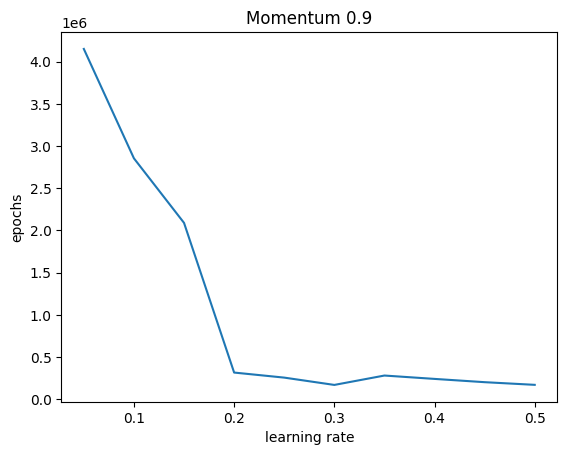

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1-x)


def backpropogation(training_data, label,num_hidden_units,num_output_units,momentum, learning_rate):
    

    np.random.seed(4)
    
    dim_input=np.shape(training_data)[1]
    print("dim_input:",dim_input)
    
    # initialise all weights (and biases) to random in [-1:1]
    W_ih = 2*np.random.random((dim_input,num_hidden_units)) - 1          # weight  for layer input to hidden - last column has the bias for the hidden layer 5X4
    B_h  = 2*np.random.random(num_hidden_units)  - 1                           # bias hidden layers  [1,4]    
    W_ho = 2*np.random.random((num_hidden_units,num_output_units)) - 1       # weights for layer hidden to output - last column has the bia for the output layer
    b_o  = 2*np.random.random(num_output_units)  - 1                           # bias output layer (scalar)
    
    data_array=np.array(training_data)
    #print("data_array :",data_array)
    
    converged = False
    epochs = 0
        
    training_data_size = len(training_data)
    # print("training_data_size",training_data_size)
    
    Error=np.zeros(training_data_size)
    Y_output=np.zeros(training_data_size)
    Y_hidden=np.zeros((training_data_size,dim_input))

    # initialise to zero
    W_ih_prev = np.zeros((training_data_size,np.shape(W_ih)[0], np.shape(W_ih)[1]))
    W_ho_prev = np.zeros((training_data_size,np.shape(W_ho)[0], np.shape(W_ho)[1]))   

    # we need to keep the previous 
    

    print("Initial weights (input to hidden): ")
    print(W_ih)
    print("Initial bias (input to hidden): ")
    print(B_h)
    print("Initial weights (hidden to output):")
    print(W_ho)
    print("Initial bias (hidden to output): ")
    print(b_o)
    print("epochs :",epochs)
    
    while not converged:
        epochs += 1

        # forward propagation - one training data x at a time
        for x in range(training_data_size):
      
            # ======================      
            # 1. Forward propagation 
            # ====================== 
            
            # output at hidden layers
            # print("data_array[x] : ",data_array[x])
            # print("W_ih : ",W_ih)
            # print("B_h : ",B_h)
            V_h = np.dot(data_array[x], W_ih)+B_h
            # print("V_h: ",V_h)
            Y_h = np.array([sigmoid(V_h)])  
            Y_hidden[x]=Y_h

          
            Y_o = sigmoid(np.dot(Y_h, W_ho)+b_o)
            Y_output[x]=Y_o
   
            # 2. calculate error
            Error[x]=label[x]-Y_output[x]
            total_error = np.abs(Error).max()
            # check for convergence 
            if total_error < 0.05:  
                print("Final weights (input to hidden):")
                print(W_ih)
                print("Final weights (hidden to output):")
                print(W_ho)
                converged = True
                break
            # print("Error[x] :",Error[x])
  
            # ==================  
            # 2. Backpropagation 
            # ================== 
      
            # delta for output layer 
            delta_k=Error[x]*sigmoid_deriv(Y_output[x])
            # print("delta_k:",delta_k)
      
            # delta for hidden layer            
            delta_j = delta_k*(W_ho.T)* sigmoid_deriv(Y_h)
            # print("delta_j:",delta_j)
  
            #W_ih_next = (learning_rate * np.outer(data_array[x],delta_j)) + (momentum * W_ih_prev[x])
            #W_ho_next = (learning_rate * np.outer(Y_h, delta_k)) + (momentum * W_ho_prev[x])
    
            #  ============================
            #  Note : no momentum used here 
            #  ============================
            W_ih_next = learning_rate * np.outer(data_array[x],delta_j)  
            W_ho_next = learning_rate * np.outer(Y_h, delta_k) 

            W_ih += W_ih_next
            W_ho += W_ho_next

            W_ih_prev[x] = W_ih_next
            W_ho_prev[x] = W_ho_next
            
            # perform the update for the bias - hidden and output layer 
            b_o += learning_rate * delta_k       # scalar - formula for weight_update_ho replacing y_h with 1 
     
            B_h += learning_rate * np.sum(delta_j, axis=0)        # [1,4] 
  
        # if epochs%10000  == 0:
        #     print("total_error :",total_error) 
        #     print("weights (input to hidden): ")
        #     print(W_ih)
        #     print("bias (input to hidden): ")
        #     print(B_h)
        #     print(" weights (hidden to output):")
        #     print(W_ho)
        #     print("bias (hidden to output): ")
        #     print(b_o)
        #     print("epochs :",epochs)
            

    return epochs, Error


bin = [0,1]
learningRate = []
epochs = []
trainingData = [ (a,b,c,d,) for a in bin for b in bin for c in bin  for d in bin]

trainingLabels = [1 if np.sum(data) % 2 else 0 for data in trainingData]
learningRates = np.arange(0.05,0.55,0.05, dtype=float)  # modified to make it shorter

num_hidden_units=4
num_output_units=1

for rate in learningRates:
    epoch, Error = backpropogation(trainingData,trainingLabels,num_hidden_units,num_output_units, 0.9, rate)
    learningRate.append(rate)
    epochs.append(epoch)
    print(epoch)

plt.plot(learningRate, epochs)
plt.title("Momentum 0.9")
plt.xlabel("learning rate")
plt.ylabel("epochs")
plt.show()
